**Importing Libraries**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from pandas import DataFrame
from pandas import concat
from sklearn.model_selection import TimeSeriesSplit,cross_val_score
from sklearn.model_selection import train_test_split
from numpy import asarray
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

**Reading Data**

In [2]:
path='./data_for_dm_assignment_kanpur.csv'
df=pd.read_csv(path)

In [3]:
df

,date,pm25,pm10,o3,no2,so2,co
0,2022/4/1,158.0,90.0,25.0,NaN,21.0,10.0
1,2022/4/2,145.0,144.0,27.0,NaN,10.0,11.0
2,2022/4/3,155.0,129.0,21.0,NaN,24.0,12.0
3,2022/4/4,152.0,92.0,28.0,NaN,22.0,14.0
4,2022/4/5,145.0,64.0,26.0,NaN,15.0,11.0
5,2022/4/6,110.0,85.0,21.0,NaN,25.0,17.0
6,2022/4/7,141.0,75.0,20.0,NaN,20.0,19.0
7,2022/4/8,130.0,89.0,24.0,NaN,27.0,20.0
8,2022/4/9,141.0,107.0,28.0,NaN,22.0,20.0
9,2022/4/10,151.0,87.0,24.0,NaN,18.0,19.0


**Removing data before 2019-01**

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df

**Sorting rows based on date column**

In [ ]:
df.columns
df=df.sort_values(by=['date'])
df=df.reset_index(drop=True)
df

**Data Preprocessing**
1. There are columns with empty values or empty string values.
2. Converted all columns except 'date' column to numeric data type.
3. Columns with empty values or empty string values are replaced by the mean of the column, why we have not decided to make them as zero because, it results in incorrect training , hence replacing with average of the column does not affect training in any way.

In [4]:
df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [5]:
df[['pm25','pm10','o3','no2','so2','co']]=df[['pm25','pm10','o3','no2','so2','co']].apply(pd.to_numeric,errors='coerce')
df['pm25'].fillna(df['pm25'].mean(skipna=True),inplace=True)
df['pm10'].fillna(df['pm10'].mean(skipna=True),inplace=True)
df['o3'].fillna(df['o3'].mean(skipna=True),inplace=True)
df['no2'].fillna(df['no2'].mean(skipna=True),inplace=True)
df['so2'].fillna(df['so2'].mean(skipna=True),inplace=True)
df['co'].fillna(df['co'].mean(skipna=True),inplace=True)

**AQI table**
1. Following I am making a dictionary which is actually a table for breakdown points for different pollutants like CO, NO2, O3 and thresholds for AQI (Air Quality Index) and AQI bucket threshholds i.e the term to say whether the AQI is good,satisfactory etc.1. 

In [6]:
Indices_table={}
Indices_table["AQI_Category"]=["Good","Satisfactory","Moderately_polluted","Poor","Very Poor","Severe"]
Indices_table["AQI"]=[[0,50],[51,100],[101,200],[201,300],[301,400],[401,500]]
Indices_table["pm10"]=[[0,50],[51,100],[101,250],[251,350],[351,430],[431,float("infinity")]]
Indices_table["pm25"]=[[0,30],[31,60],[61,90],[91,120],[121,250],[250.1,float("infinity")]]
Indices_table["no2"]=[[0,40],[41,80],[81,180],[181,280],[281,400],[400.1,float("infinity")]]
Indices_table["o3"]=[[0,50],[51,100],[101,168],[169,208],[209,748],[748.1,float("infinity")]]
Indices_table["co"]=[[0,1.0],[1.1,2.0],[2.1,10],[10,17],[17,34],[34.1,float("infinity")]]
Indices_table["s02"]=[[0,40],[41,80],[81,380],[381,800],[801,1600],[1600.1,float("infinity")]]
Indices_table["nh3"]=[[0,200],[201,400],[401,800],[801,1200],[1200,1800],[1800.1,float("infinity")]]
Indices_table["pb"]=[[0,0.5],[0.5,1.0],[1.1,2.0],[2.1,3.0],[3.1,3.5],[3.51,float("infinity")]]

Buckets=["Good","Satisfactory","Moderately Polluted","Poor","Very Poor","Severe"]


**Computing AQI from the available pollutants and adding AQI and AQI Bucket as a new column**
1. In the following code, a new column AQI and AQI_bucket is added to the dataframe. AQI is calculated by taking the formula given by Indian Standards

In [10]:

def calculate_aqi(row):
  #pm2.5
  cp=round(row['pm25'])
  pollutant=Indices_table["pm25"]
  aqi=Indices_table["AQI"]
  for k in range(0,len(pollutant)):
    if(cp>=pollutant[k][0] and cp<=pollutant[k][1]):
      bphi=pollutant[k][1]
      if(bphi==float("infinity")):
        bphi=cp+0.1
      bplo=pollutant[k][0]
      ihi=aqi[k][1]
      ilo=aqi[k][0]
      pm25=((ihi-ilo)/(bphi-bplo))*(cp-bplo)+ilo
      break

  cp=round(row['pm10'])
  pollutant=Indices_table["pm10"]
  aqi=Indices_table["AQI"]
  for k in range(0,len(pollutant)):
    if(cp>=pollutant[k][0] and cp<=pollutant[k][1]):
      bphi=pollutant[k][1]
      if(bphi==float("infinity")):
        bphi=cp+0.1
      bplo=pollutant[k][0]
      ihi=aqi[k][1]
      ilo=aqi[k][0]
      pm10=((ihi-ilo)/(bphi-bplo))*(cp-bplo)+ilo
      break
  
  cp=round(row['o3'])
  pollutant=Indices_table["o3"]
  aqi=Indices_table["AQI"]
  for k in range(0,len(pollutant)):
    if(cp>=pollutant[k][0] and cp<=pollutant[k][1]):
      bphi=pollutant[k][1]
      if(bphi==float("infinity")):
        bphi=cp+0.1
      bplo=pollutant[k][0]
      ihi=aqi[k][1]
      ilo=aqi[k][0]
      o3=((ihi-ilo)/(bphi-bplo))*(cp-bplo)+ilo
      break
  
  cp=round(row['no2'])
  pollutant=Indices_table["no2"]
  aqi=Indices_table["AQI"]
  for k in range(0,len(pollutant)):
    if(cp>=pollutant[k][0] and cp<=pollutant[k][1]):
      bphi=pollutant[k][1]
      if(bphi==float("infinity")):
        bphi=cp+0.1
      bplo=pollutant[k][0]
      ihi=aqi[k][1]
      ilo=aqi[k][0]
      no2=((ihi-ilo)/(bphi-bplo))*(cp-bplo)+ilo
      break
  
  cp=round(row['co'])
  pollutant=Indices_table["co"]
  aqi=Indices_table["AQI"]
  for k in range(0,len(pollutant)):
    if(cp>=pollutant[k][0] and cp<=pollutant[k][1]):
      bphi=pollutant[k][1]
      if(bphi==float("infinity")):
        bphi=cp+0.1
      bplo=pollutant[k][0]
      ihi=aqi[k][1] 
      ilo=aqi[k][0]
      co=((ihi-ilo)/(bphi-bplo))*(cp-bplo)+ilo
      break
  p=max(pm25,pm10,o3,no2,co)
  bucket=''
    
  for k in range(0,len(Indices_table["AQI_Category"])):
    if(p>=aqi[k][0] and p<=aqi[k][1]):
      bucket=Buckets[k]
      break
  return p,bucket


In [11]:
c=[]
buckets=[]
for index,row in df.iterrows():
    print(index)
    aqi,bucket=calculate_aqi(row)
    c.append(aqi)
    buckets.append(bucket)
df["aqi"]=c
df["aqi_bucket"]=buckets

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430


In [12]:
df

,date,pm25,pm10,o3,no2,so2,co,aqi,aqi_bucket
0,2022/4/1,158.000000,90.000000,25.000000,28.467183,21.000000,10.000000,329.395349,Very Poor
1,2022/4/2,145.000000,144.000000,27.000000,28.467183,10.000000,11.000000,319.418605,Very Poor
2,2022/4/3,155.000000,129.000000,21.000000,28.467183,24.000000,12.000000,327.093023,Very Poor
3,2022/4/4,152.000000,92.000000,28.000000,28.467183,22.000000,14.000000,324.790698,Very Poor
4,2022/4/5,145.000000,64.000000,26.000000,28.467183,15.000000,11.000000,319.418605,Very Poor
5,2022/4/6,110.000000,85.000000,21.000000,28.467183,25.000000,17.000000,300.000000,Poor
6,2022/4/7,141.000000,75.000000,20.000000,28.467183,20.000000,19.000000,316.348837,Very Poor
7,2022/4/8,130.000000,89.000000,24.000000,28.467183,27.000000,20.000000,318.470588,Very Poor
8,2022/4/9,141.000000,107.000000,28.000000,28.467183,22.000000,20.000000,318.470588,Very Poor
9,2022/4/10,151.000000,87.000000,24.000000,28.467183,18.000000,19.000000,324.023256,Very Poor


**Now Time series forecasting process starts**(We are proceeding according to the steps mentioned below)
1. First we will define a function which transforms given time series data into a supervised learning dataset
2. Then we will train the data with the randome forest regressor
3. Test the model



In [13]:
df.shape

(2552, 9)

In [14]:
df.values

array([['2022/4/1', 158.0, 90.0, ..., 10.0, 329.3953488372093,
        'Very Poor'],
       ['2022/4/2', 145.0, 144.0, ..., 11.0, 319.4186046511628,
        'Very Poor'],
       ['2022/4/3', 155.0, 129.0, ..., 12.0, 327.09302325581393,
        'Very Poor'],
       ...,
       ['2015/3/10', 173.17164511814534, 109.25217391304348, ..., 3.0,
        340.90697674418607, 'Very Poor'],
       ['2014/7/13', 173.17164511814534, 109.25217391304348, ..., 10.0,
        340.90697674418607, 'Very Poor'],
       ['2015/4/23', 173.17164511814534, 109.25217391304348, ..., 13.0,
        340.90697674418607, 'Very Poor']], dtype=object)

**Below is the function which converts data into supervised learning dataset**

In [15]:
def prepare_forcasting_data(series:pd.DataFrame):
    series.loc[:, "aqi_yesterday"] = series.loc[:, "aqi"].shift(1)
    series.loc[:, "aqi_diff_1"] = series.loc[:, "aqi_yesterday"].diff(1)
    series.loc[:, "aqi_diff_2"] = series.loc[:, "aqi_diff_1"].shift(1)
    series.loc[:, "aqi_diff_3"] = series.loc[:, "aqi_diff_1"].shift(2)
    series.loc[:, "aqi_diff_4"] = series.loc[:, "aqi_diff_1"].shift(3)
    series.loc[:, "aqi_diff_5"] = series.loc[:, "aqi_diff_1"].shift(4)
    series.loc[:, "aqi_diff_6"] = series.loc[:, "aqi_diff_1"].shift(5)
    series.loc[:, "aqi_diff_7"] = series.loc[:, "aqi_diff_1"].shift(6)
    series.loc[:, "aqi_diff_8"] = series.loc[:, "aqi_diff_1"].shift(7)
    series.loc[:, "aqi_diff_9"] = series.loc[:, "aqi_diff_1"].shift(8)
    series.loc[:, "aqi_yesteryear"] = series.loc[:, "aqi"].shift(365)
    series.loc[:, "aqi_yeardiff_1"] = series.loc[:, "aqi_yesteryear"].diff(365)
    return series


In [16]:
def convert_into_supervised(series:pd.DataFrame,dropnan=1):
    n_vars = 1 if type(series) is list else series.shape[1]
    n_vars=n_vars-3
    df1 = DataFrame(series)
    df1=df1.drop(df1.columns[[0,7,8]],axis=1)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(1, 0, -1):
        cols.append(df1.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, 1):
        cols.append(df1.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    #put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
    

In [17]:
s=convert_into_supervised(df.values)
s1=DataFrame(s)
print(s1.columns)

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)'],
      dtype='object')


In [18]:
s1

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,158,90,25,28.4672,21,10,145,144,27,28.4672,10,11
2,145,144,27,28.4672,10,11,155,129,21,28.4672,24,12
3,155,129,21,28.4672,24,12,152,92,28,28.4672,22,14
4,152,92,28,28.4672,22,14,145,64,26,28.4672,15,11
5,145,64,26,28.4672,15,11,110,85,21,28.4672,25,17
6,110,85,21,28.4672,25,17,141,75,20,28.4672,20,19
7,141,75,20,28.4672,20,19,130,89,24,28.4672,27,20
8,130,89,24,28.4672,27,20,141,107,28,28.4672,22,20
9,141,107,28,28.4672,22,20,151,87,24,28.4672,18,19
10,151,87,24,28.4672,18,19,138,85,26,28.4672,12,13


In [19]:
def random_forest_forecast(hist,X_train,Y_train,testX):
    # transform list into array
    
    # split into input and output columns
    trainX, trainy = X_train,Y_train
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

In [29]:
def walk_forward_validation(data):
    predictions = list()
    # split dataset
    X=[]
    Y=[]
    train=[]
    test=[]
    count=0
    for index,row in data.iterrows():
        temp_input=[]
        temp=[]
        temp1=[]
        for j in range(0,6,1):
            temp_input.append(row[j])
            temp.append(row[j])
        temp_output=[]
        for j in range(6,12,1):
            temp_output.append(row[j])
            temp.append(row[j])
        X.append(temp_input)
        Y.append(temp_output)
        train.append(temp)
    print("success")
    X=np.array(X)
    Y=np.array(Y)
    X_train=X[:1551]
    Y_train=Y[:1551]
    X_test=X[1551:]
    Y_test=Y[1551:]
    test=train[1551:]
    train=train[:1551]
    
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    
    actual_aqi=[]    
    for i in range(0,1000):
        # split test row into input and output columns
        testX, testy = X_test[i],Y_test[i]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history,X_train,Y_train,testX)
        # store forecast in list of predictions
        row={}
        row['pm25']=yhat[0]
        row['pm10']=yhat[1]
        row['o3']=yhat[2]
        row['no2']=yhat[3]
        row['so2']=yhat[4]
        row['co']=yhat[5]
        predicted_aqi,bucket=calculate_aqi(row)
        print(i)
        predictions.append(predicted_aqi)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        row={}
        row['pm25']=testy[0]
        row['pm10']=testy[1]
        row['o3']=testy[2]
        row['no2']=testy[3]
        row['so2']=testy[4]
        row['co']=testy[5]
        actual,bucket=calculate_aqi(row)
        print(i)
        actual_aqi.append(actual)
        
    predictions=np.array(predictions)
    actual=np.array(actual_aqi)
    # estimate prediction error
    error = mean_absolute_error(actual, predictions)
    return error, actual, predictions

In [ ]:
mae, y, yhat = walk_forward_validation(s)


success
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100
101
101
102
102
103
103
104
104
105
105
106
106
107
107
108
108
109
109
110
110
111
111
112
112
113
113
114
114
115
115
116
116
117
117
118
118
119
119
120
120
121
121
122
122
123
123
124
124
125
125
126
126
127
127
128
128
129
129
130
130
131
131
132
132
133
133
134
134
135
135
136
136
137
137
138
138
139
139
140
140
141
141
142
142
143
143
144
144
145
145
146
146
147
147
148
148
149
149
150
150
151


In [ ]:
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

**Following is the function which does the training**

In [ ]:
df.columns

In [ ]:
trainer(df[["aqi"]])

In [3]:
aqi_data = pd.read_csv("aqi.csv")

In [4]:
aqi_data['date'] = pd.to_datetime(aqi_data['date'])
aqi_data = aqi_data.sort

In [8]:
aqi_data=aqi_data.sort_values(by=['date'])
aqi_data=aqi_data.reset_index(drop=True)
aqi_data=aqi_data.set_index("date")

In [42]:
aqi_data = aqi_data[aqi_data.index.year >= 2016]

# Analysis

#### Here we plot the Aqi data as it is without any interpolation applied
- Observation
    - The Aqi data seems to follow a periodic pattern with period of 1 yr

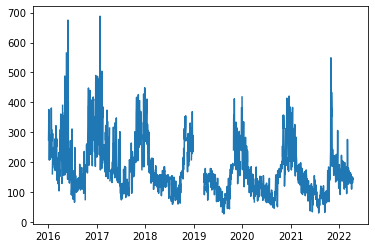

In [43]:
fig, ax = plt.subplots()
ax.plot(aqi_data["aqi"])

### Yearly trend of AQI
- Anomalies
    - 2014 data does not contain pm25 values which is the primary contributor to the AQI incase of Kanpur
    - 2015 data does not contain pm25 values initail half of janaury and second half of the year considering beggining and end of the year are the post polluting.
    - 2019 data does not contain pm25 values for Jan, Feb and First half of the march so it lower than expected value
- Observation
    - There is downwards trend in the pollution, the 2019 case has been explained earlier but 2022 might be higher because we have not observed the data for middle months which generally have lower pollution.

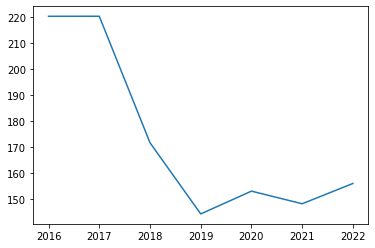

In [44]:
fig, ax = plt.subplots()
ax.plot(aqi_data["aqi"].groupby(aqi_data.index.year).mean())


### Monthly trends across the years
- Anomalies
    - 2014 data does not contain pm25 values which is the primary contributor to the AQI incase of Kanpur
    - 2015 data does not contain pm25 values initail half of janaury and second half of the year considering beggining and end of the year are the post polluting.
    - 2019 data does not contain pm25 values for Jan, Feb and First half of the march
- Observation
    - As observed in years globally there is a general trend of aqi lowering till 2020/2021 then slow ascend.
    - Mar, Apr, May have low aqi during 2020 incomparison to other years which can be due to the Covid lockdown during that period.

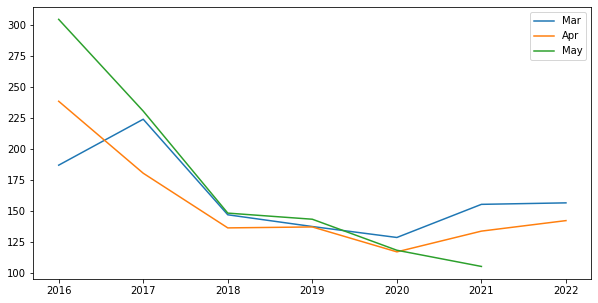

In [52]:
months2num = {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sept":9,"Oct":10,"Nov":11,"Dec":12}

# Change the months list to show for different datas
months_list = ["Mar","Apr","May"]

fig, ax = plt.subplots(figsize=(10, 5))
for month in months_list:
    datum = aqi_data[aqi_data.index.month==months2num[month]]
    # g = datum["aqi"].groupby(datum.index.year)
    ax.plot(datum["aqi"].groupby(datum.index.year).mean(),label=month)
ax.legend()
# datum

### Pollution across the year
- It appears as if Nov month has highest aqi levels (Winter)
- Month of august has lowest aqi (Could be due to monsoon)
- Sudden spike in May.

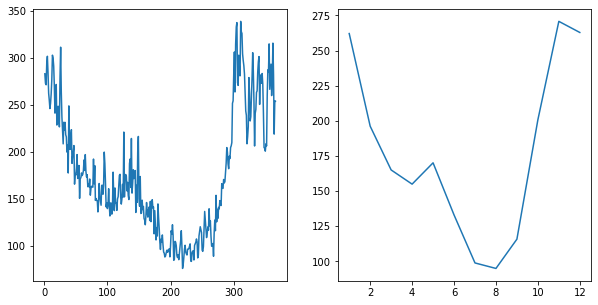

In [54]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))

ax[0].plot(aqi_data["aqi"].groupby(aqi_data.index.day_of_year).mean())
ax[1].plot(aqi_data["aqi"].groupby(aqi_data.index.month).mean())